In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define the complete path to your dataset
DATASET_PATH = '/content/drive/My Drive/50.035 CV Team 9'


# Change directory to the dataset location
%cd "/content/drive/My Drive/50.035 CV Team 9"

# Verify the path exists (optional check)
import os
assert os.path.exists(DATASET_PATH), "[!] Dataset path does not exist. Please check the path."

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1Mdz9CpJD5zYhDk1e3Ch93fV4o95Ud7HJ/50.035 CV Team 9


In [ ]:
%%capture
def is_running_in_colab():
    try:
        import google.colab
        return True
    except ImportError:
        return False

if is_running_in_colab():
  # Normal packages
  %pip install lightning polars
  # Dev packages
  %pip install icecream rich tqdm

In [ ]:
import torch
import polars as pl
import json
import numpy as np
import lightning as L
from lightning.pytorch.callbacks import RichProgressBar

from icecream import ic

!pip install torchmetrics
!pip install torch torchvision lightning torchmetrics polars icecream

In [ ]:
print("GPU available:", torch.cuda.is_available())

GPU available: True


INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


Resuming from checkpoint: checkpoints/squeezenet/plantvillage-epoch=09-val_accuracy=0.98.ckpt


Downloading: "https://download.pytorch.org/models/squeezenet1_0-b66bff10.pth" to /root/.cache/torch/hub/checkpoints/squeezenet1_0-b66bff10.pth
100%|██████████| 4.78M/4.78M [00:00<00:00, 84.6MB/s]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/callbacks/model_checkpoint.py:654: Checkpoint directory /content/drive/.shortcut-targets-by-id/1Mdz9CpJD5zYhDk1e3Ch93fV4o95Ud7HJ/50.035 CV Team 9/checkpoints/squeezenet exists and is not empty.
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name                  | Type                      | Params | Mode 
----------------------------------------------------------------------------
0 | model                 | SqueezeNetModel           | 746 K  | train
1 | val_metrics           | MetricCollection          | 0      | train
2 | test_metrics          | MetricCollection          | 0      | train
3 | val_confusion_matrix  | MulticlassConfusionMatrix

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 15 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:43: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)  # noqa: B028


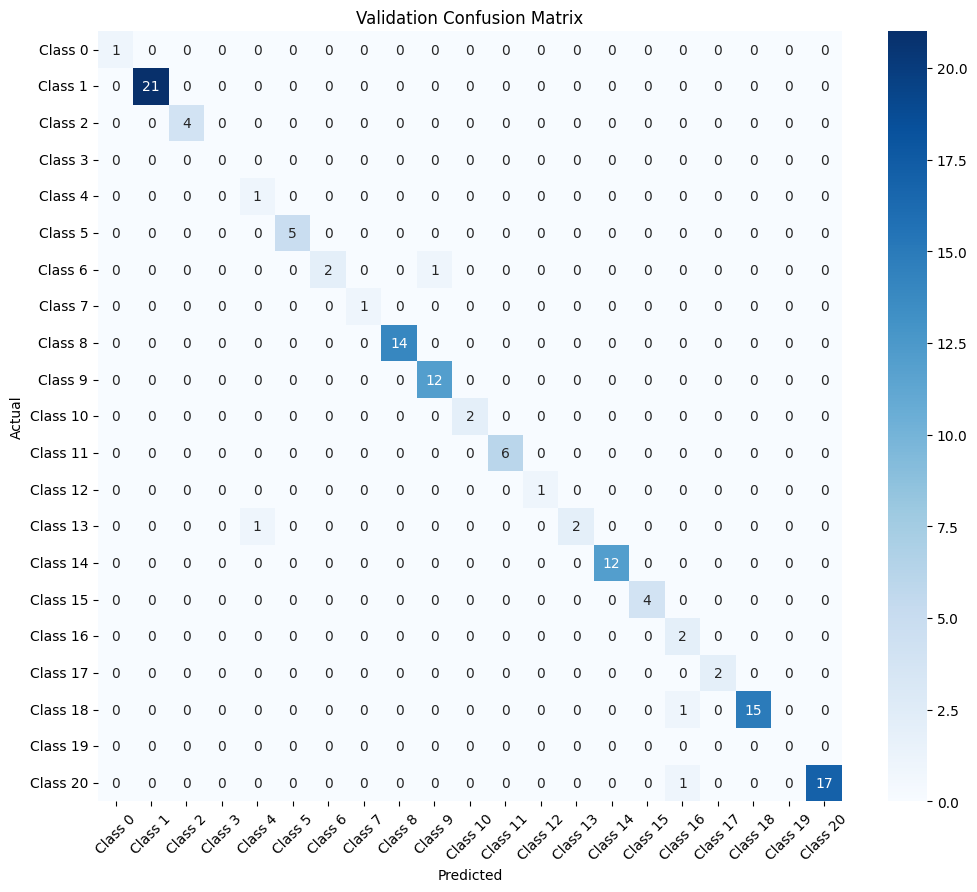

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 15 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:43: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)  # noqa: B028


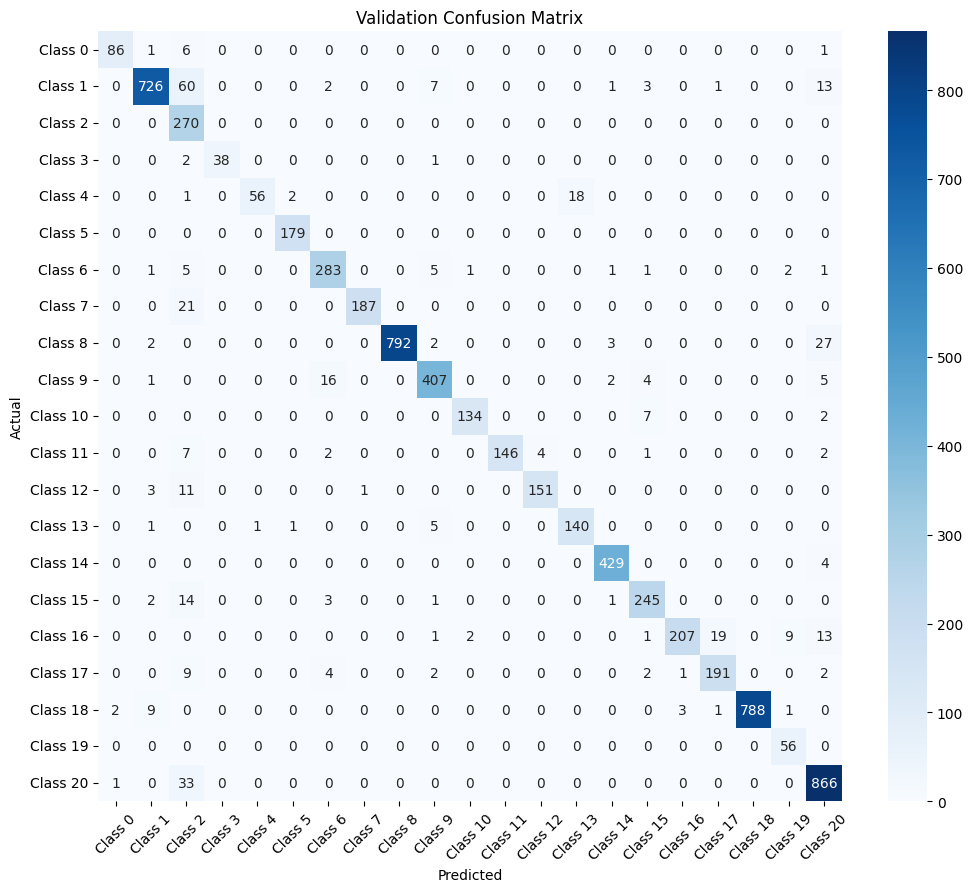

Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:43: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)  # noqa: B028


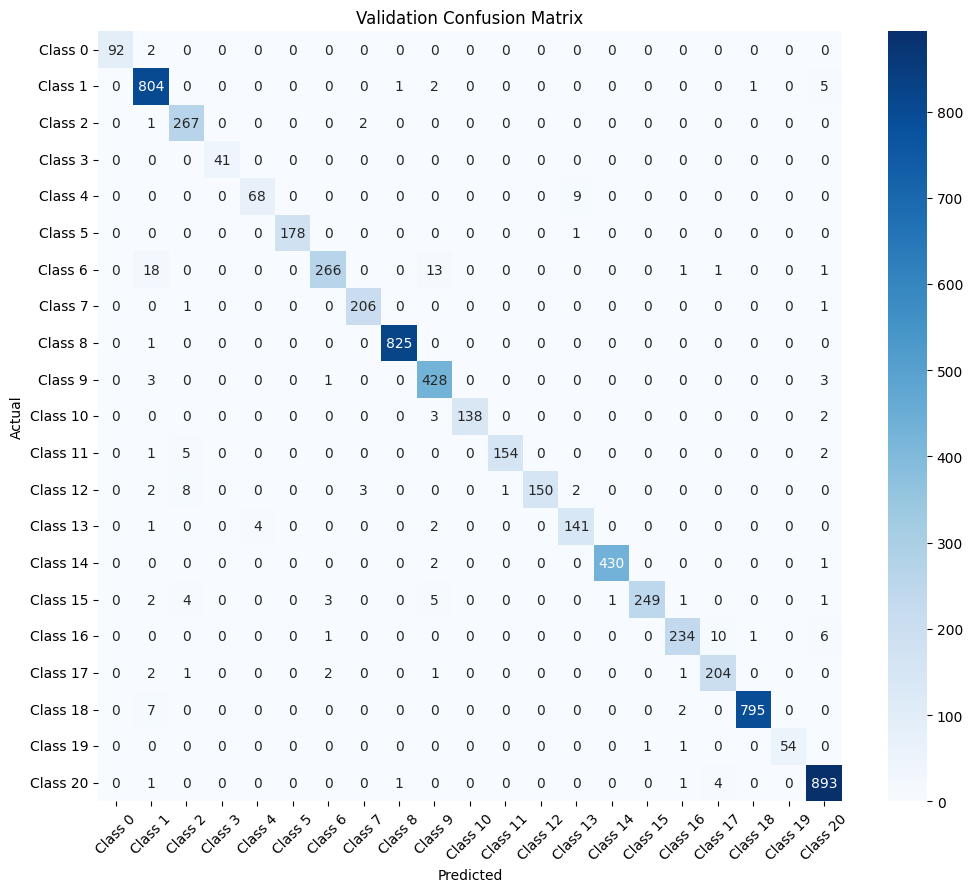

Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:43: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)  # noqa: B028


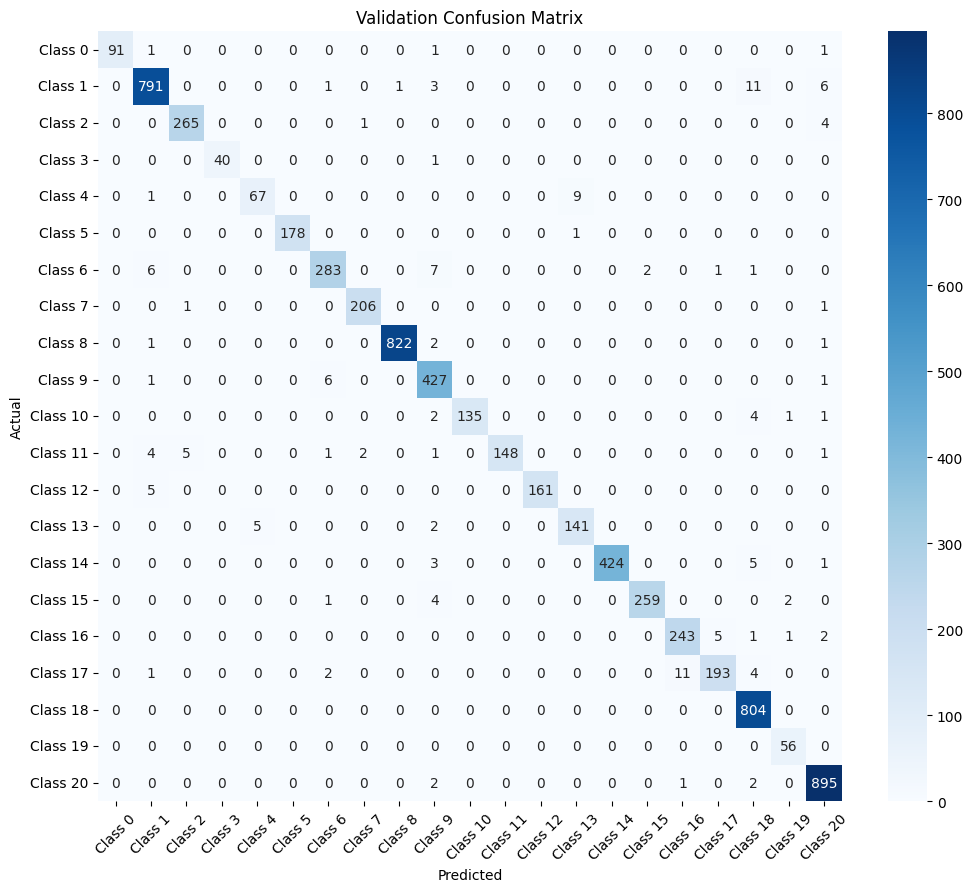

Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:43: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)  # noqa: B028


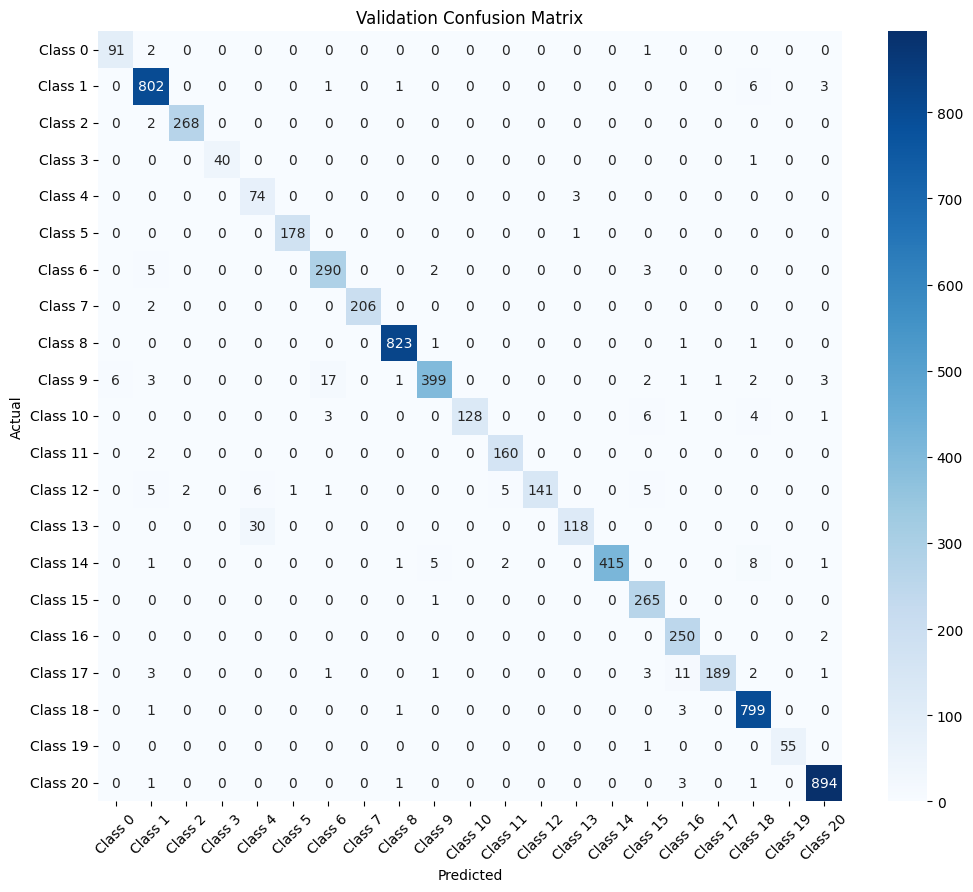

Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:43: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)  # noqa: B028


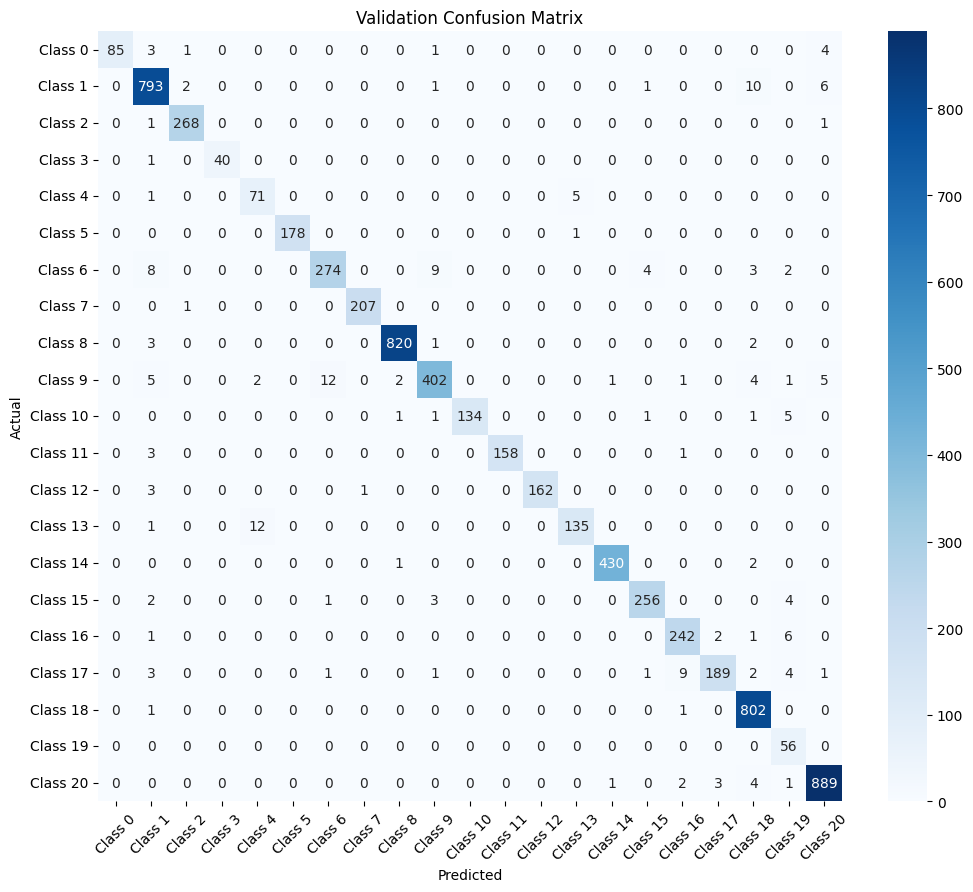

Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:43: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)  # noqa: B028


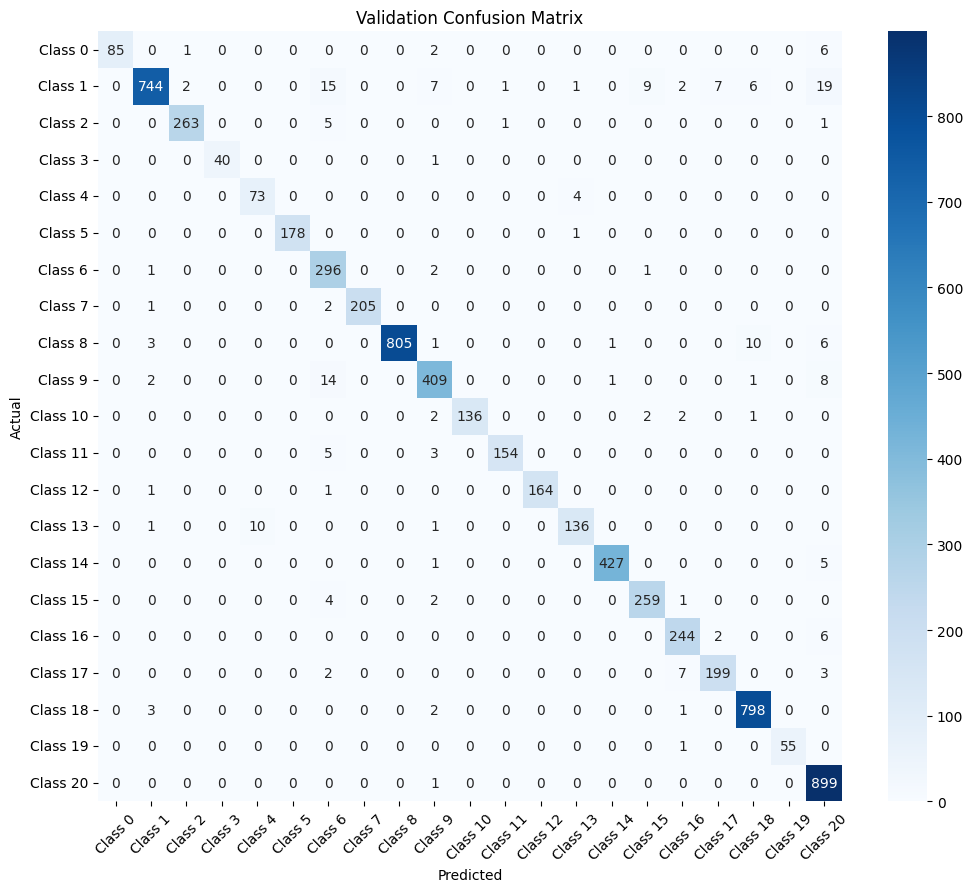

Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:43: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)  # noqa: B028


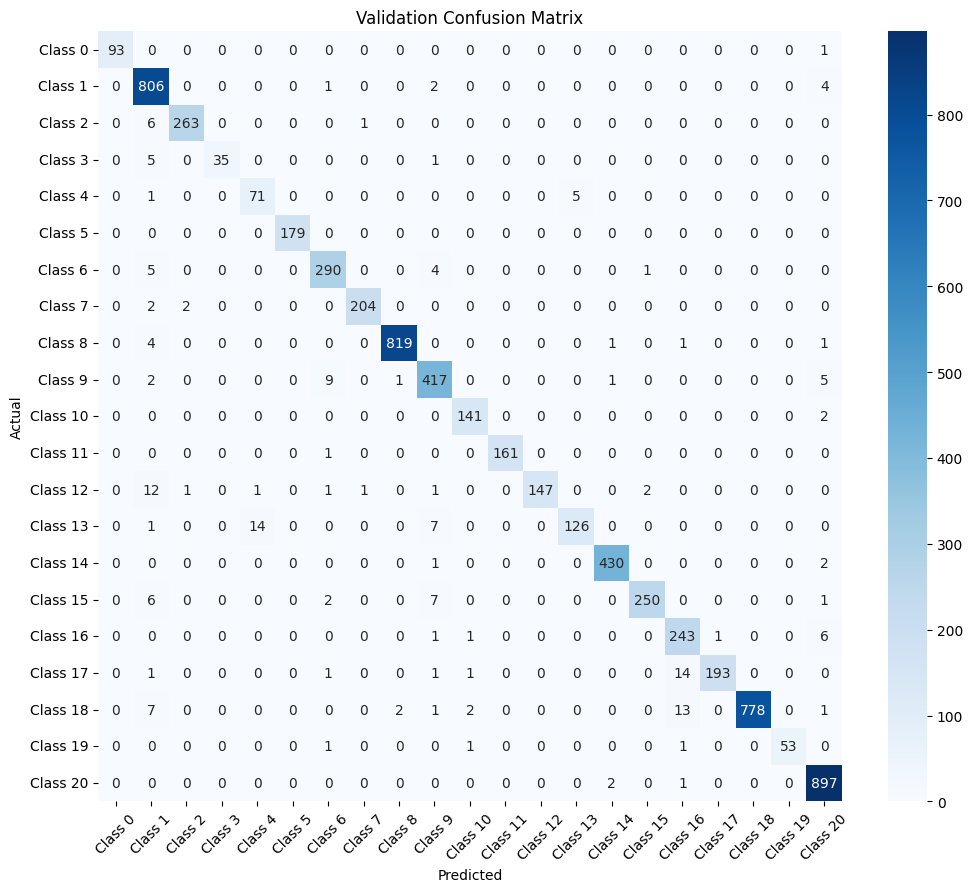

Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:43: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)  # noqa: B028


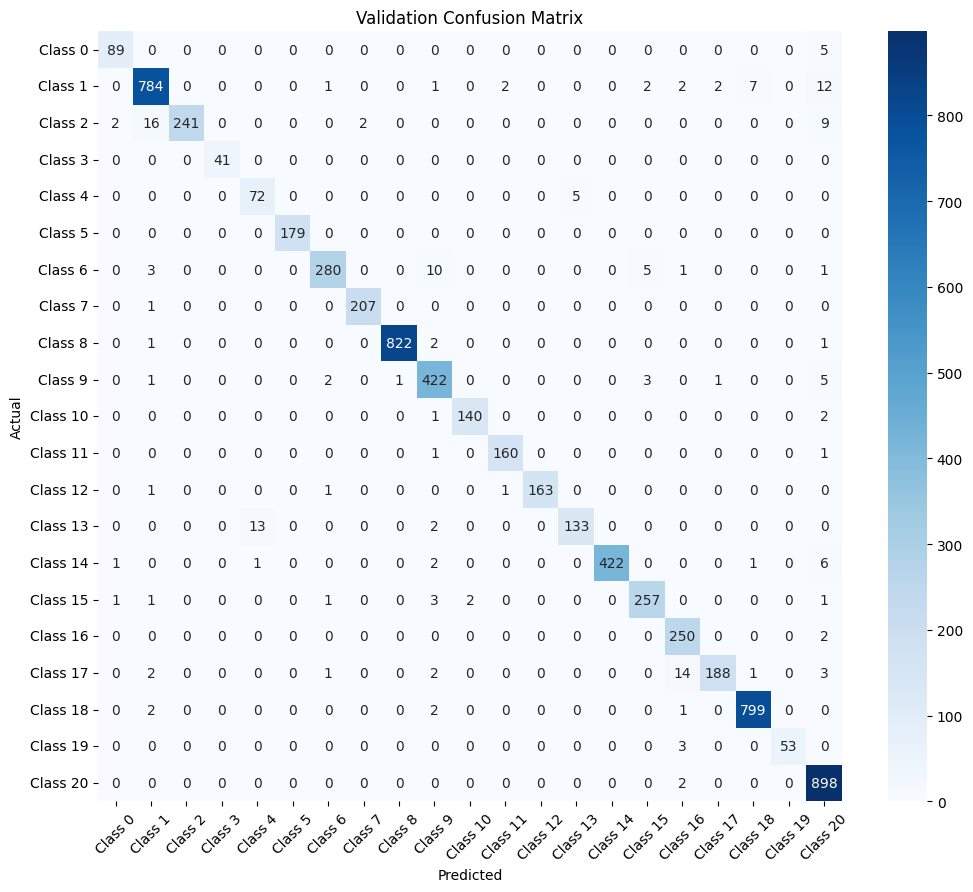

Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:43: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)  # noqa: B028


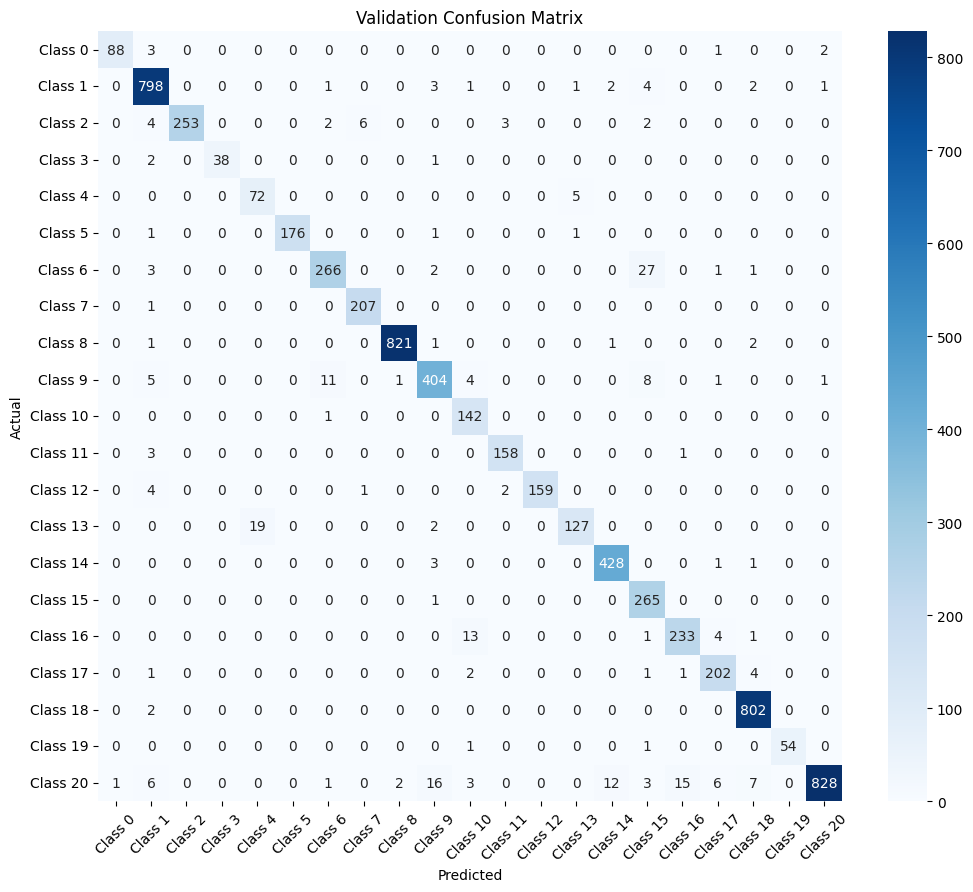

Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:43: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)  # noqa: B028


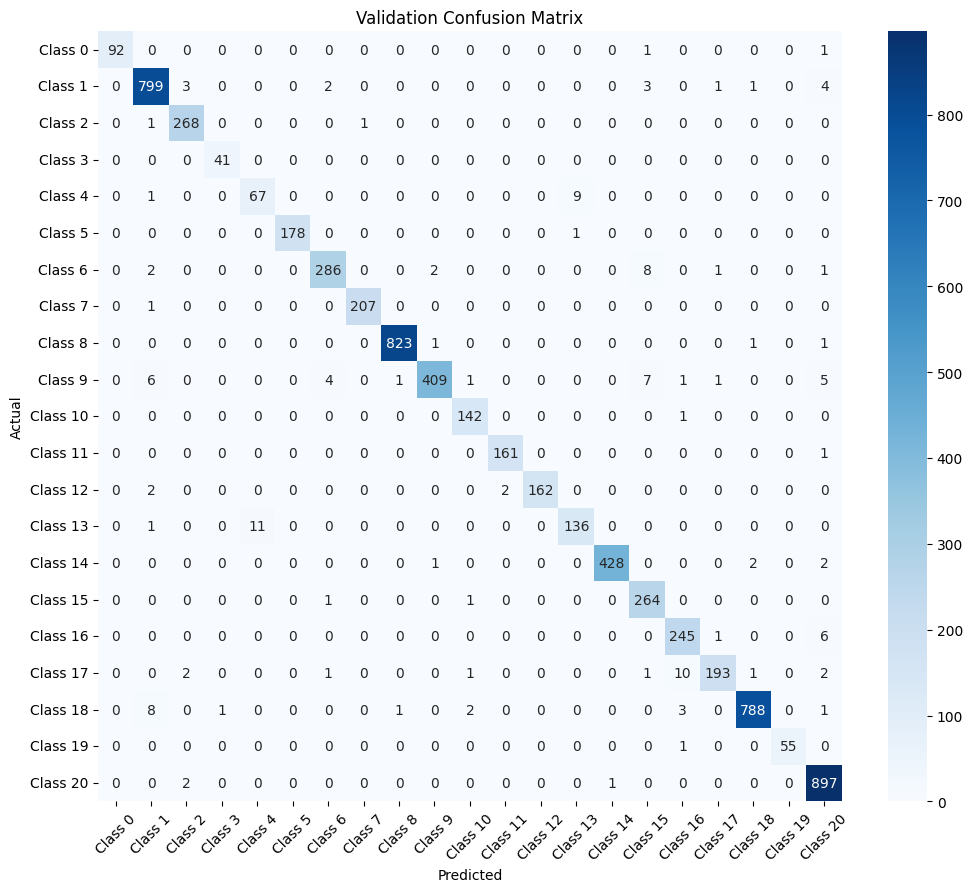

INFO: `Trainer.fit` stopped: `max_epochs=10` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


In [ ]:
import torch
import lightning as L
import torchmetrics
from torchvision.models import squeezenet1_0, SqueezeNet1_0_Weights
from torchvision.io import decode_image
from torchvision.transforms import v2
import numpy as np
import polars as pl
from pathlib import Path
from lightning.pytorch.callbacks import ModelCheckpoint
from torchmetrics import ConfusionMatrix
import matplotlib.pyplot as plt
import seaborn as sns

class ImageDataset(torch.utils.data.Dataset):
    def __init__(self, dataframe: pl.DataFrame, training=False):
        super().__init__()
        paths = dataframe.select('image_path').to_numpy().squeeze()
        self.image_path = np.array([
            str(Path('plantvillage_dataset/color') / '/'.join(Path(p).parts[-2:]))
            for p in paths
        ])
        self.disease_type = dataframe.select('disease_type').to_numpy().squeeze()
        self.disease_to_idx = {disease: i for i, disease in enumerate(np.unique(self.disease_type))}
        self.training = training
        self.train_transforms = v2.Compose([
            v2.RandomHorizontalFlip(),
            v2.RandomVerticalFlip(),
            v2.RandomErasing(),
        ])
        self.transforms = v2.Compose([
            v2.ToDtype(torch.float32, scale=True),
        ])

    def __len__(self):
        return len(self.image_path)

    def __getitem__(self, idx):
        image = decode_image(self.image_path[idx])
        if self.training:
            image = self.train_transforms(image)
        image = self.transforms(image)
        disease = self.disease_to_idx[self.disease_type[idx]]
        return image, disease

class PlantVillageData(L.LightningDataModule):
    def __init__(self, ws_root: Path = Path("."), num_workers=0):
        super().__init__()
        metadata_path = ws_root / 'plantvillage_dataset' / 'metadata'
        self.train_ds = ImageDataset(pl.read_csv(metadata_path / 'resampled_training_set.csv').filter(pl.col('image_path').str.contains('augment').eq(False)), training=True)
        self.val_ds = ImageDataset(pl.read_csv(metadata_path / 'validation_set.csv'))
        self.test_ds = ImageDataset(pl.read_csv(metadata_path / 'test_set.csv'))

        self.n_classes = len(self.train_ds.disease_to_idx)
        self.idx_to_disease = {v: k for k, v in self.train_ds.disease_to_idx.items()}

        self.dataloader_extras = dict(
            num_workers=num_workers,
            pin_memory=True,
            persistent_workers=num_workers > 0
        )

    def train_dataloader(self):
        return torch.utils.data.DataLoader(self.train_ds, batch_size=32, shuffle=True, **self.dataloader_extras)

    def val_dataloader(self):
        return torch.utils.data.DataLoader(self.val_ds, batch_size=64, **self.dataloader_extras)

    def test_dataloader(self):
        return torch.utils.data.DataLoader(self.test_ds, batch_size=64, **self.dataloader_extras)

class SqueezeNetModel(torch.nn.Module):
    def __init__(self, n_classes):
        super().__init__()
        self.model = squeezenet1_0(weights=SqueezeNet1_0_Weights.DEFAULT)
        self.model.classifier[1] = torch.nn.Conv2d(512, n_classes, kernel_size=(1, 1))
        self.model.num_classes = n_classes

    def forward(self, x):
        return self.model(x)

class LitSqueezeNet(L.LightningModule):
    def __init__(self, n_classes, class_names=None):
        super().__init__()
        self.model = SqueezeNetModel(n_classes)
        self.n_classes = n_classes
        self.class_names = class_names if class_names else [f"Class {i}" for i in range(n_classes)]

        self.val_metrics = torchmetrics.MetricCollection(
            {
                "accuracy": torchmetrics.classification.Accuracy(task="multiclass", num_classes=n_classes),
                "f1": torchmetrics.classification.F1Score(task="multiclass", num_classes=n_classes),
                "auroc": torchmetrics.classification.AUROC(task="multiclass", num_classes=n_classes)
            },
            prefix="val_",
        )
        self.test_metrics = self.val_metrics.clone(prefix="test_")

        # Confusion Matrix
        self.val_confusion_matrix = ConfusionMatrix(task="multiclass", num_classes=n_classes)
        self.test_confusion_matrix = ConfusionMatrix(task="multiclass", num_classes=n_classes)
        self.val_preds = []
        self.val_targets = []
        self.test_preds = []
        self.test_targets = []

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_pred = self.model(x)
        loss = torch.nn.functional.cross_entropy(y_pred, y)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_pred = self.model(x)
        self.log_dict(self.val_metrics(y_pred, y), prog_bar=True)

        # Store predictions and targets for confusion matrix
        self.val_preds.append(y_pred.argmax(dim=-1).detach())
        self.val_targets.append(y.detach())

    def on_validation_epoch_end(self):
        self.val_confusion_matrix = self.val_confusion_matrix.to(self.device)

        val_preds = torch.cat(self.val_preds).to(self.device)
        val_targets = torch.cat(self.val_targets).to(self.device)

        cm = self.val_confusion_matrix(val_preds, val_targets).cpu().numpy()

        self.plot_confusion_matrix(cm, class_names=self.class_names, title="Validation Confusion Matrix")

        self.val_preds.clear()
        self.val_targets.clear()

    def test_step(self, batch, batch_idx):
        x, y = batch
        y_pred = self.model(x)
        self.log_dict(self.test_metrics(y_pred, y), prog_bar=True)

        self.test_preds.append(y_pred.argmax(dim=-1).detach())
        self.test_targets.append(y.detach())

    def on_test_epoch_end(self):

        self.test_confusion_matrix = self.test_confusion_matrix.to(self.device)

        test_preds = torch.cat(self.test_preds).to(self.device)
        test_targets = torch.cat(self.test_targets).to(self.device)

        cm = self.test_confusion_matrix(test_preds, test_targets).cpu().numpy()

        self.plot_confusion_matrix(cm, class_names=self.class_names, title="Test Confusion Matrix")

        self.test_preds.clear()
        self.test_targets.clear()

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=1e-3)

    def plot_confusion_matrix(self, cm, class_names, title="Confusion Matrix"):
        plt.figure(figsize=(12, 10))
        sns.heatmap(
            cm,
            annot=True,
            fmt="d",
            cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names
        )
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title(title)
        plt.xticks(rotation=45)
        plt.show()

plantvillage_data = PlantVillageData(num_workers=15)

checkpoint_callback = ModelCheckpoint(
    dirpath='checkpoints/squeezenet',
    filename='plantvillage-{epoch:02d}-{val_accuracy:.2f}',
    save_top_k=3,
    monitor='val_accuracy',
    mode='max'
)

trainer = L.Trainer(
    max_epochs=10,
    accelerator='gpu',
    callbacks=[checkpoint_callback],
    logger=None
)

checkpoints = list(Path('checkpoints/squeezenet').glob('*.ckpt'))
if checkpoints:

    latest_checkpoint = max(checkpoints, key=lambda x: x.stat().st_mtime)
    print(f"Resuming from checkpoint: {latest_checkpoint}")

    lit_model = LitSqueezeNet.load_from_checkpoint(
        str(latest_checkpoint),
        n_classes=plantvillage_data.n_classes
    )
else:
    print("Starting fresh training...")
    lit_model = LitSqueezeNet(plantvillage_data.n_classes)

trainer.fit(model=lit_model, datamodule=plantvillage_data)


INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 15 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Testing: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:43: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)  # noqa: B028


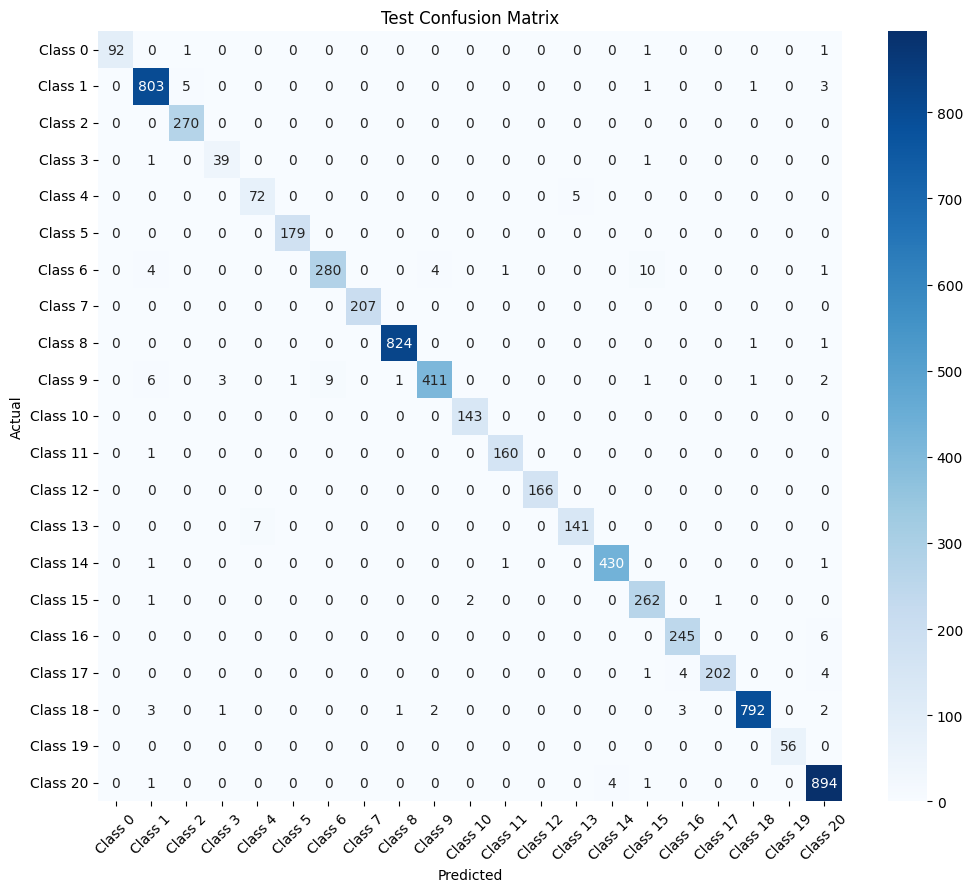

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.9831907749176025     │
│        test_auroc         │    0.8242440223693848     │
│          test_f1          │    0.9831907749176025     │
└───────────────────────────┴───────────────────────────┘

[{'test_accuracy': 0.9831907749176025,
  'test_auroc': 0.8242440223693848,
  'test_f1': 0.9831907749176025}]

In [ ]:
trainer.test(model=lit_model, datamodule=plantvillage_data)